# Assignment 3
**Aana Kakroo**

#### Task: Build a CNN model for Bird species

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential

In [2]:
# unzipping the zip file containing image dataset
!unzip '/content/drive/MyDrive/Colab Notebooks/Aana Kakroo Externship Assignments/bird_classification.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/Aana Kakroo Externship Assignments/bird_classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating:

##### Data Augmentation

In [3]:
# import required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_gen = ImageDataGenerator(
    rescale=(1./255), # (0 to 255) convert to (0 to 1)
    #rotation_range=20,  # Rotate images randomly up to 20 degrees
    #width_shift_range=0.2,  # Shift images horizontally by a fraction of total width
    #height_shift_range=0.2,  # Shift images vertically by a fraction of total height
    shear_range=0.2,  # Shear transformations
    #zoom_range=0.2,  # Randomly zoom in/out on images
    horizontal_flip=True,  # Randomly flip images horizontally
)
test_gen = ImageDataGenerator(rescale=(1./255))  

In [25]:
train = train_gen.flow_from_directory('/content/test_data/test_data',
                                      target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/train_data/train_data',
                                    target_size=(120, 120),
                                      class_mode='categorical', 
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 150 images belonging to 16 classes.


In [26]:
# getting indices of class names
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

##### CNN model

In [7]:
# importing the required libraries
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [20]:
# Initializing the sequential model
model = Sequential()
# Adding convolutional layer with input
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(120, 120, 3)))
# Normalizing the convolutional layer output
model.add(BatchNormalization())
# Selecting the maximum values
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropping the unwanted 20% of data
model.add(Dropout(0.2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Hiddern layers
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
# Output layer
model.add(Dense(16,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 batch_normalization_15 (Bat  (None, 118, 118, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 59, 59, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 batch_normalization_16 (Bat  (None, 57, 57, 64)      

In [31]:
# compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

##### Early stopping

In [12]:
# import required libraries
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='accuracy',patience=8)

In [32]:
# fit the model and use early stopping
history = model.fit(train,batch_size=8,validation_data=test,epochs=100,callbacks=early_stop)

Epoch 1/100
20/20 [==============================] - 115s 6s/step - loss: 0.3720 - accuracy: 0.8854 - val_loss: 3.8995 - val_accuracy: 0.2733
Epoch 2/100
20/20 [==============================] - 108s 5s/step - loss: 0.4016 - accuracy: 0.8854 - val_loss: 3.9735 - val_accuracy: 0.3000
Epoch 3/100
20/20 [==============================] - 146s 7s/step - loss: 0.4888 - accuracy: 0.8408 - val_loss: 4.1725 - val_accuracy: 0.2800
Epoch 4/100
20/20 [==============================] - 147s 7s/step - loss: 0.2913 - accuracy: 0.9427 - val_loss: 4.7959 - val_accuracy: 0.2933
Epoch 5/100
20/20 [==============================] - 147s 8s/step - loss: 0.2764 - accuracy: 0.9236 - val_loss: 4.1656 - val_accuracy: 0.2733
Epoch 6/100
20/20 [==============================] - 145s 7s/step - loss: 0.4109 - accuracy: 0.8662 - val_loss: 3.8637 - val_accuracy: 0.2467
Epoch 7/100
20/20 [==============================] - 146s 8s/step - loss: 0.3398 - accuracy: 0.8854 - val_loss: 3.2992 - val_accuracy: 0.3800
Epoch 

##### Plotting accuracy and loss

In [28]:
# import the required libraries
import matplotlib.pyplot as plt

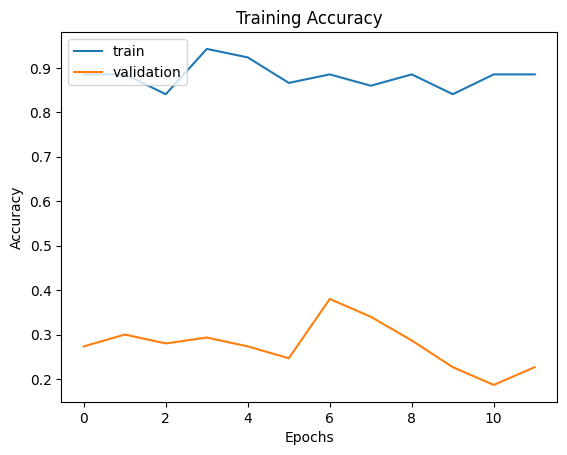

In [33]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

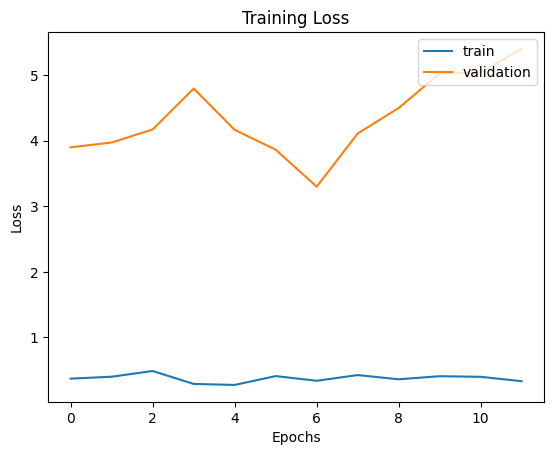

In [34]:
# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

##### Testing

In [39]:
# importing required libraries
from tensorflow.keras.preprocessing import image

# testing on random image
img = image.load_img('/content/test_data/test_data/lbicrw/100_4917.JPG',target_size=(120,120))
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
pred = np.argmax(model.predict(img))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 51ms/step
12
lbicrw
